In [209]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [210]:
gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

theory_markers = {
    8: ROOT.kFullDotLarge,
    9: ROOT.kFullDotLarge,
    10: ROOT.kOpenTriangleUp,
    11: ROOT.kOpenDiamond
}

pipkmks_colors = {
    8: ROOT.kBlue+1,
    9: ROOT.kBlue+2,
    10: ROOT.kBlue-4,
    11: ROOT.kBlue-7
}

pimkpks_colors = {
    8: ROOT.kRed+1,
    9: ROOT.kRed+2,
    10: ROOT.kRed-4,
    11: ROOT.kRed-7
}

clas_colors = {
    2.45: ROOT.kGreen+1,
    2.55: ROOT.kGreen+2,
    2.65: ROOT.kGreen-4,
    2.75: ROOT.kGreen-7,
}

clas_markers = {
    2.45: ROOT.kOpenDiamond,
    2.55: ROOT.kOpenSquare,
    2.65: ROOT.kOpenTriangleUp,
    2.75: ROOT.kOpenCircle
}

In [211]:
path_to_fit_result_files = '/work/halld/home/viducic/data/fit_params/{}/tf1_gaus_cross_section_values.csv'
df_pipkmks = pd.read_csv(path_to_fit_result_files.format('pipkmks'))
df_pimkpks = pd.read_csv(path_to_fit_result_files.format('pimkpks'))

pipkmks_grouped = df_pipkmks.groupby('beam_energy')
pimkpks_grouped = df_pimkpks.groupby('beam_energy')

In [212]:
pipkmks_graphs = []
for beam_energy, group in pipkmks_grouped:
    graph = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cross_section_error.to_numpy())
    graph.SetName(f'pipkmks_{beam_energy}')
    graph.SetMarkerColor(pipkmks_colors[beam_energy])
    graph.SetMarkerStyle(gluex_markers[beam_energy])
    graph.SetLineColor(pipkmks_colors[beam_energy])
    graph.SetLineWidth(2)
    graph.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    pipkmks_graphs.append(graph)



In [213]:
pimkpks_graphs = []
for beam_energy, group in pimkpks_grouped:
    graph = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cross_section_error.to_numpy())
    graph.SetName(f'pimkpks_{beam_energy}')
    graph.SetMarkerColor(pimkpks_colors[beam_energy])
    graph.SetMarkerStyle(gluex_markers[beam_energy])
    graph.SetLineColor(pimkpks_colors[beam_energy])
    graph.SetLineWidth(2)
    graph.SetMarkerSize(1.35)
    graph.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph.SetTitle('E_{#gamma} = ' + str(beam_energy) + ' GeV')
    pimkpks_graphs.append(graph)

In [214]:
theory_graphs = []

for beam in [8, 9, 10, 11]:
    theory_filename = '/work/halld/home/viducic/theory_predictions/t-slope-{}GeVnew.dat'
    theory_df = pd.read_csv(theory_filename.format(beam), delim_whitespace=True)
    theory_df.columns = ['t', 'diff_cs']
    theory_df = theory_df.loc[(theory_df['t'] > 0.35) & (theory_df['t'] < 1.9)]
    theory_graph = ROOT.TGraph(len(theory_df.t.to_numpy()), theory_df.t.to_numpy(), theory_df.diff_cs.to_numpy())
    theory_graph.SetName(f'theory_graph_{beam}')
    theory_graph.SetMarkerColor(pipkmks_colors[beam])
    theory_graph.SetLineColor(pipkmks_colors[beam])
    theory_graph.SetMarkerStyle(theory_markers[beam])
    theory_graph.SetMarkerSize(1.0)
    theory_graphs.append(theory_graph)

In [ ]:
clas_filename = '/work/halld/home/viducic/scripts/plotting/dnp_maui/clas_data.csv'
clas_df = pd.read_csv(clas_filename)
for complex_col in ["t", "dsigma_dt", "clas_error", "error_t"]:
    clas_df[complex_col] = clas_df[complex_col].apply(lambda x: x[1:-5])
for col in clas_df.columns:
    clas_df[col] = clas_df[col].astype('Float64')
# clas_df['error_t'] = clas_df['clas_error'].apply(lambda x: abs(x))
clas_df = clas_df[clas_df['t'] < 1.9]
clas_df = clas_df[clas_df['w'] >= 2.45]
clas_300 = clas_df[(clas_df['w'] == 2.55)]
clas_325 = clas_df[(clas_df['w'] == 2.65)]
clas_350 = clas_df[(clas_df['w'] == 2.75)]

clas_grouped = clas_df.groupby('w')
clas_graphs = []
for w, group in clas_grouped:
    clas_graph = ROOT.TGraphErrors(len(group.t.to_numpy()), group.t.to_numpy(), group.dsigma_dt.to_numpy(), np.zeros(len(group.t.to_numpy())), group.error_t.to_numpy())
    clas_graph.SetName(f'clas_graph_{w}')
    clas_graph.SetMarkerColor(clas_colors[w])
    clas_graph.SetMarkerStyle(clas_markers[w])
    clas_graph.SetLineColor(clas_colors[w])
    clas_graph.SetLineWidth(2)
    clas_graph.GetXaxis().SetTitle('-t [GeV^{2}]')
    clas_graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    # clas_graph.GetYaxis().SetTitleSize(0.05)
    # clas_graph.GetXaxis().SetTitleSize(0.05)
    # clas_graph.GetYaxis().SetTitleOffset(0.9)
    # clas_graph.GetXaxis().SetTitleOffset(0.9)
    clas_graphs.append(clas_graph)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


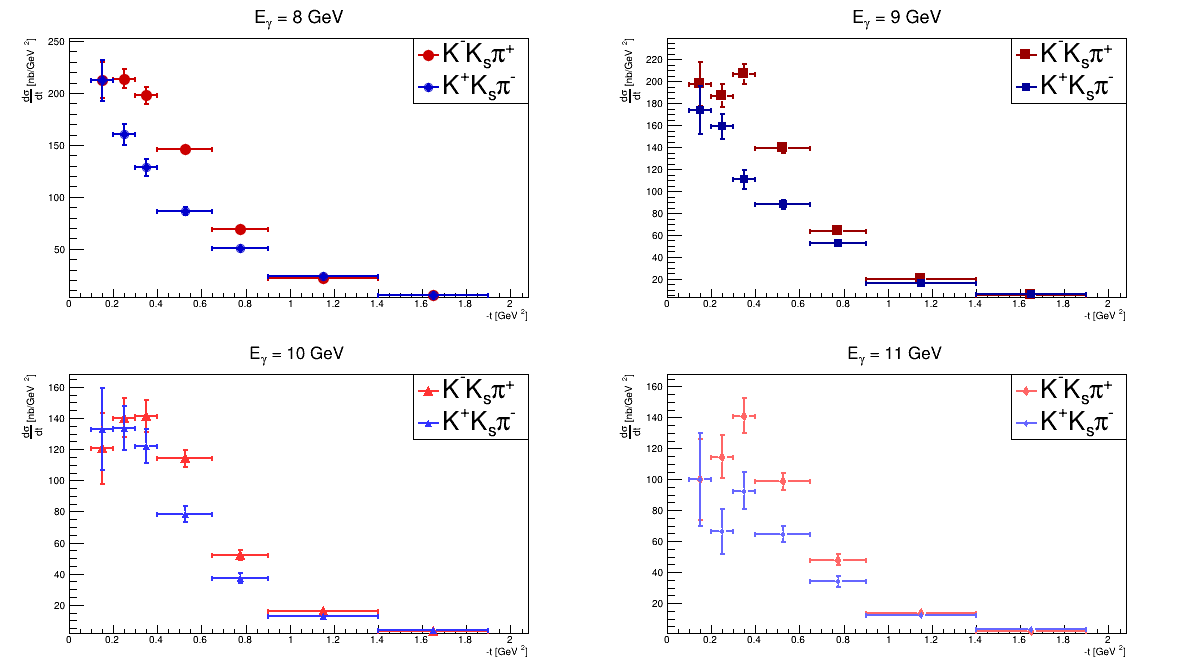

In [215]:
c = ROOT.TCanvas('c', 'c', 1200, 700)
c.Divide(2, 2)

all_four_energies_legends = []

for i, graph in enumerate(pimkpks_graphs):
    legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
    legend.AddEntry(graph, 'K^{-}K_{s}#pi^{+}', 'lpf')
    legend.AddEntry(pipkmks_graphs[i], 'K^{+}K_{s}#pi^{-}', 'lpf')
    all_four_energies_legends.append(legend)
    c.cd(i+1)
    graph.Draw('AP')
    pipkmks_graphs[i].Draw('P')
    all_four_energies_legends[i].Draw()
c.Draw()

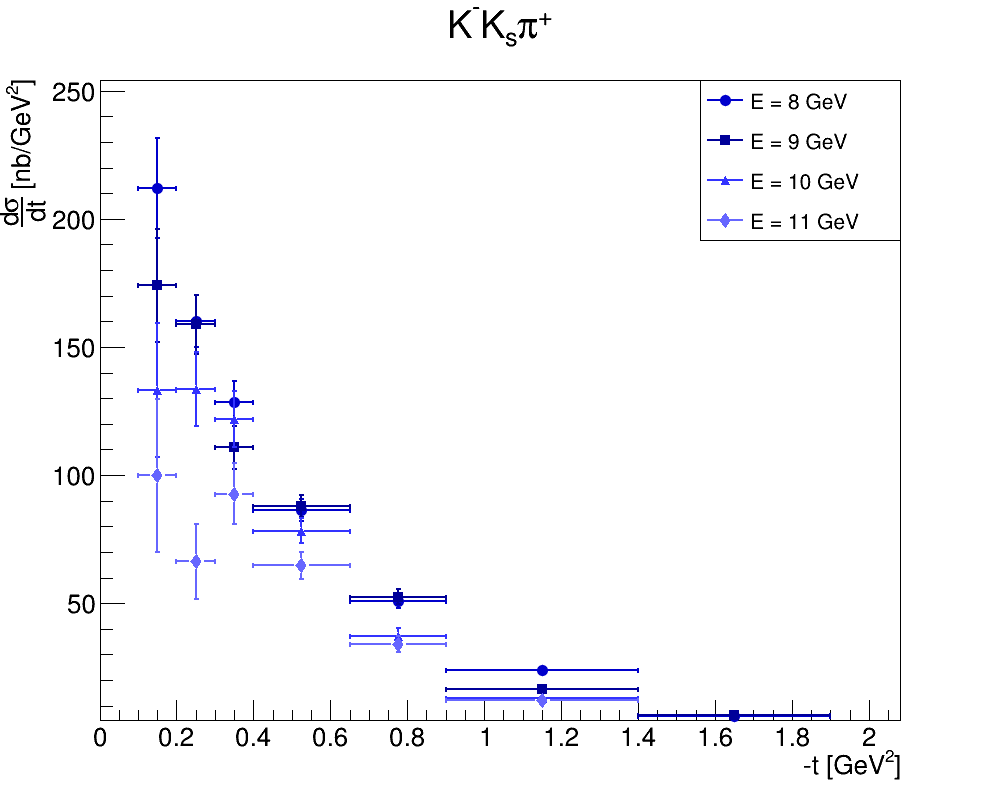

In [216]:
c.Clear()
c.SetCanvasSize(1000, 800);

pipkmks_graphs[0].SetTitle('K^{-}K_{s}#pi^{+}')

pipkmks_graphs[0].SetMarkerSize(1.25)
pipkmks_graphs[1].SetMarkerSize(1.25)
pipkmks_graphs[2].SetMarkerSize(1.25)
pipkmks_graphs[3].SetMarkerSize(2.0)

# pipkmks_graphs[0].SetMarkerColor(ROOT.kBlack)
# pipkmks_graphs[1].SetMarkerColor(ROOT.kBlack)
# pipkmks_graphs[2].SetMarkerColor(ROOT.kBlack)
# pipkmks_graphs[3].SetMarkerColor(ROOT.kBlack)

pipkmks_legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
pipkmks_legend.AddEntry(pipkmks_graphs[0], 'E = 8 GeV', 'lp')
pipkmks_legend.AddEntry(pipkmks_graphs[1], 'E = 9 GeV', 'lp')
pipkmks_legend.AddEntry(pipkmks_graphs[2], 'E = 10 GeV', 'lp')
pipkmks_legend.AddEntry(pipkmks_graphs[3], 'E = 11 GeV', 'lp')
pipkmks_graphs[0].Draw('AP')
pipkmks_graphs[1].Draw('P')
pipkmks_graphs[2].Draw('P')
pipkmks_graphs[3].Draw('P')
pipkmks_legend.Draw()
c.Draw()

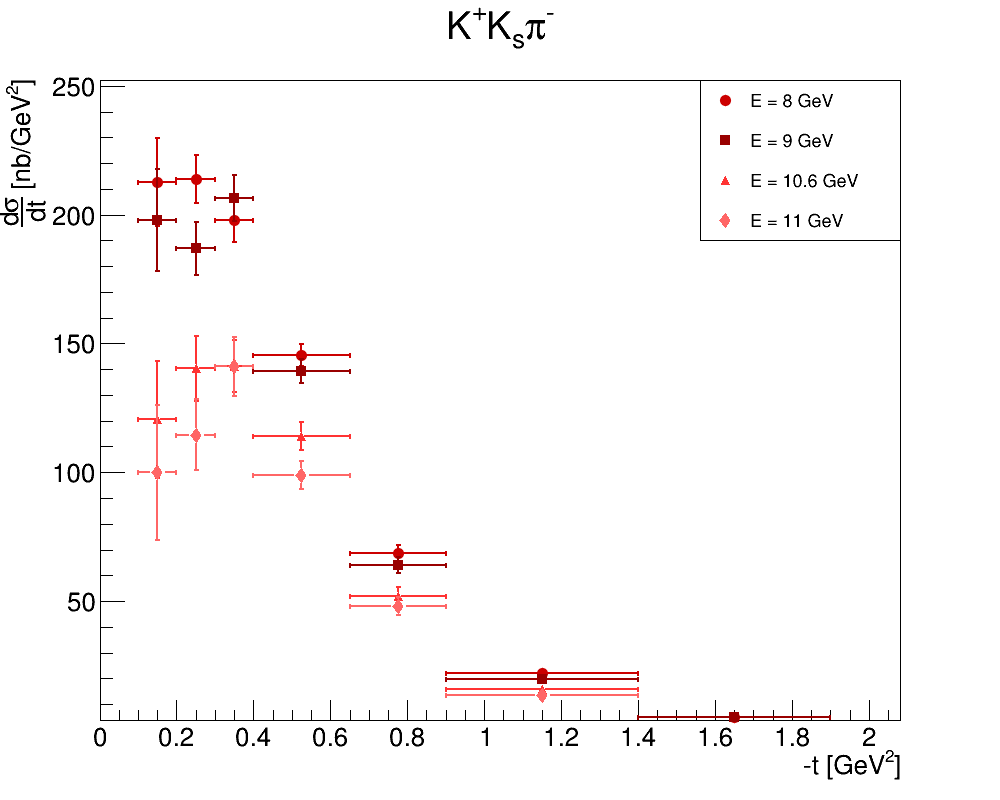

In [217]:
c.Clear()
c.SetCanvasSize(1000, 800)

pimkpks_graphs[0].SetTitle('K^{+}K_{s}#pi^{-}')

pimkpks_graphs[0].SetMarkerSize(1.25)
pimkpks_graphs[1].SetMarkerSize(1.25)
pimkpks_graphs[2].SetMarkerSize(1.25)
pimkpks_graphs[3].SetMarkerSize(2.0)

# pimkpks_graphs[0].SetMarkerColor(ROOT.kBlack)
# pimkpks_graphs[1].SetMarkerColor(ROOT.kBlack)
# pimkpks_graphs[2].SetMarkerColor(ROOT.kBlack)
# pimkpks_graphs[3].SetMarkerColor(ROOT.kBlack)

pimkpks_legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
pimkpks_legend.AddEntry(pimkpks_graphs[0], 'E = 8 GeV', 'p')
pimkpks_legend.AddEntry(pimkpks_graphs[1], 'E = 9 GeV', 'p')
pimkpks_legend.AddEntry(pimkpks_graphs[2], 'E = 10.6 GeV', 'p')
pimkpks_legend.AddEntry(pimkpks_graphs[3], 'E = 11 GeV', 'p')
pimkpks_graphs[0].Draw('AP')
pimkpks_graphs[1].Draw('P')
pimkpks_graphs[2].Draw('P')
pimkpks_graphs[3].Draw('P')
pimkpks_legend.Draw()
c.Draw()

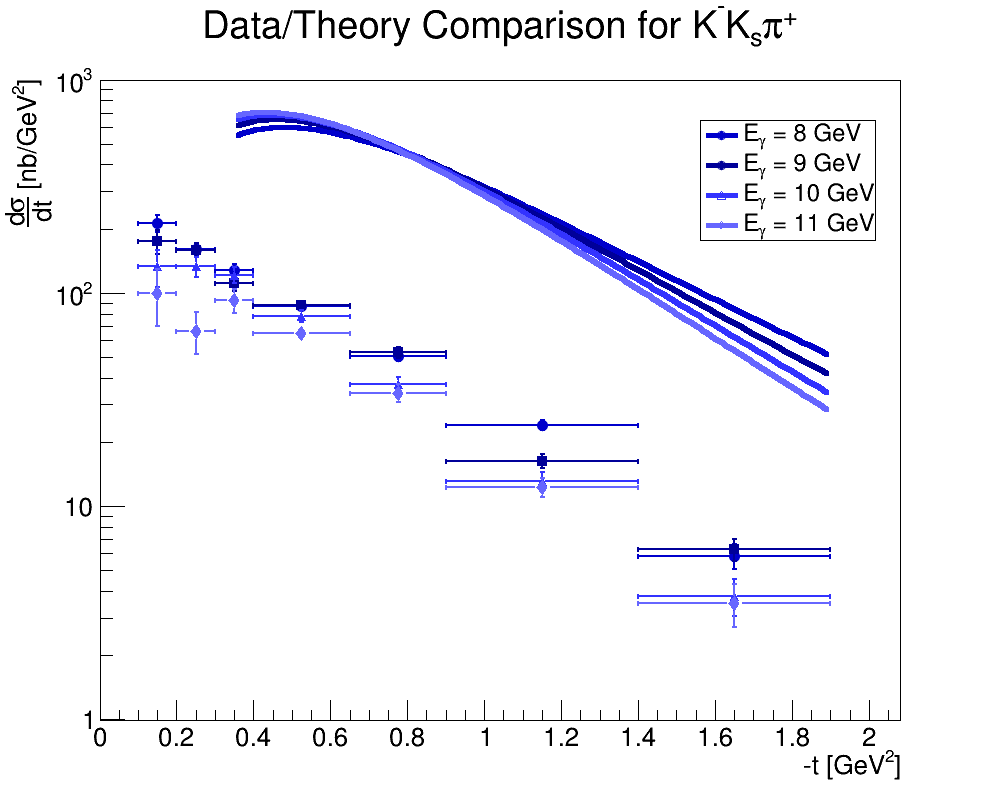

In [218]:
c.Clear()
c.SetCanvasSize(1000, 800)
c.SetLogy()

theory_compare_legend = ROOT.TLegend(0.7, 0.7, 0.875, 0.85)
theory_compare_legend.AddEntry(theory_graphs[0], 'E_{#gamma} = 8 GeV', 'lfp')
theory_compare_legend.AddEntry(theory_graphs[1], 'E_{#gamma} = 9 GeV', 'lfp')
theory_compare_legend.AddEntry(theory_graphs[2], 'E_{#gamma} = 10 GeV', 'lfp')
theory_compare_legend.AddEntry(theory_graphs[3], 'E_{#gamma} = 11 GeV', 'lfp')

pipkmks_graphs[0].SetTitle('Data/Theory Comparison for K^{-}K_{s}#pi^{+}')
pipkmks_graphs[0].SetLineColor(pipkmks_colors[8])
pipkmks_graphs[1].SetLineColor(pipkmks_colors[9])
pipkmks_graphs[2].SetLineColor(pipkmks_colors[10])
pipkmks_graphs[3].SetLineColor(pipkmks_colors[11])
pipkmks_graphs[0].SetMarkerColor(pipkmks_colors[8])
pipkmks_graphs[1].SetMarkerColor(pipkmks_colors[9])
pipkmks_graphs[2].SetMarkerColor(pipkmks_colors[10])
pipkmks_graphs[3].SetMarkerColor(pipkmks_colors[11])
theory_graphs[0].SetLineWidth(5)
theory_graphs[1].SetLineWidth(5)
theory_graphs[2].SetLineWidth(5)
theory_graphs[3].SetLineWidth(5)

pipkmks_graphs[0].GetYaxis().SetRangeUser(1.0, 1000)
pipkmks_graphs[0].Draw('AP')
pipkmks_graphs[1].Draw('P')
pipkmks_graphs[2].Draw('P')
pipkmks_graphs[3].Draw('P')
theory_graphs[0].Draw('L')
theory_graphs[1].Draw('L')
theory_graphs[2].Draw('L')
theory_graphs[3].Draw('L')
theory_compare_legend.Draw()
c.Draw()


In [ ]:
c.Clear()
c.SetCanvasSize(1000, 800)

clas_compare_legend = ROOT.TLegend(0.7, 0.7, 0.875, 0.85)
clas_compare_legend.AddEntry(clas_graphs[0], 'E_{#gamma} = 2.45 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(clas_graphs[1], 'E_{#gamma} = 2.55 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(clas_graphs[2], 'E_{#gamma} = 2.65 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(clas_graphs[3], 'E_{#gamma} = 2.75 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(pipkmks_graphs[0], 'E_{#gamma} = 8 GeV [GlueX]', 'lfp')
clas_compare_legend.AddEntry(pipkmks_graphs[1], 'E_{#gamma} = 9 GeV [GlueX]', 'lfp')
clas_compare_legend.AddEntry(pipkmks_graphs[2], 'E_{#gamma} = 10 GeV [GlueX]', 'lfp')
clas_compare_legend.AddEntry(pipkmks_graphs[3], 'E_{#gamma} = 11 GeV [GlueX]', 'lfp')

    